In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import epidemic_model_classes_numba as epi_mod
from scipy.integrate import odeint
import scipy.stats as st
from scipy.stats import pearsonr
import os
from tqdm import tqdm

In [78]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

country = "Brazil"
country_folder = "Brazil_adaptive_vs_fixed"
country_file_name = "brazil"
window_size = 30

log_adap = []
log_fix = []
log_fix20 = []
log_fix40 = []

for folder in os.listdir("../../logs"):
    if "adaptive_Brazil_1000_samples_SEIRD2_3_posts" in folder and f"{window_size}_day" in folder and "True" in folder:
        log_adap.append("../../logs/"+folder+"/")
    elif "fixed_Brazil_1000_samples_SEIRD2_3_posts" in folder and f"{window_size}_day" in folder and "True" in folder:
        log_fix.append("../../logs/"+folder+"/")
    elif "fixed_Brazil_1000_samples_SEIRD2_3_posts" in folder and f"20_day" in folder and "True" in folder:
        log_fix20.append("../../logs/"+folder+"/")
    elif "fixed_Brazil_1000_samples_SEIRD2_3_posts" in folder and f"40_day" in folder and "True" in folder:
        log_fix40.append("../../logs/"+folder+"/")

In [29]:
log_fix

['../logs/sdumont/log2022-03-09_12-41-19_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-25-23_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-09_13-05-59_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-33-33_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-17-00_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_15-59-04_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-09_12-32-41_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-07-57_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2022-03-09_12-57-52_fixed_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/l

In [30]:
log_fix20

['../logs/sdumont/log2022-03-08_16-13-07_fixed_Brazil_1000_samples_SEIRD2_3_posts_20_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-59-58_fixed_Brazil_1000_samples_SEIRD2_3_posts_20_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-08-43_fixed_Brazil_1000_samples_SEIRD2_3_posts_20_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-42-44_fixed_Brazil_1000_samples_SEIRD2_3_posts_20_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_15-59-59_fixed_Brazil_1000_samples_SEIRD2_3_posts_20_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-47-09_fixed_Brazil_1000_samples_SEIRD2_3_posts_20_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-04-21_fixed_Brazil_1000_samples_SEIRD2_3_posts_20_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-51-23_fixed_Brazil_1000_samples_SEIRD2_3_posts_20_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-17-45_fixed_Brazil_1000_samples_SEIRD2_3_posts_20_day-window_past_True/',
 '../logs/sdumont/l

In [31]:
log_fix40

['../logs/sdumont/log2022-03-08_17-49-19_fixed_Brazil_1000_samples_SEIRD2_3_posts_40_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-35-49_fixed_Brazil_1000_samples_SEIRD2_3_posts_40_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-22-08_fixed_Brazil_1000_samples_SEIRD2_3_posts_40_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_17-19-11_fixed_Brazil_1000_samples_SEIRD2_3_posts_40_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_17-04-12_fixed_Brazil_1000_samples_SEIRD2_3_posts_40_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_17-05-35_fixed_Brazil_1000_samples_SEIRD2_3_posts_40_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_16-50-24_fixed_Brazil_1000_samples_SEIRD2_3_posts_40_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_17-33-33_fixed_Brazil_1000_samples_SEIRD2_3_posts_40_day-window_past_True/',
 '../logs/sdumont/log2022-03-08_18-04-25_fixed_Brazil_1000_samples_SEIRD2_3_posts_40_day-window_past_True/',
 '../logs/sdumont/l

In [32]:
log_adap

['../logs/sdumont/log2021-11-14_08-50-12_adaptive_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2021-11-14_08-20-25_adaptive_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2021-11-14_09-19-06_adaptive_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2021-11-15_19-55-35_adaptive_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2021-11-14_07-46-07_adaptive_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2021-11-15_18-51-14_adaptive_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2021-11-15_18-18-23_adaptive_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2021-11-15_19-27-26_adaptive_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_True/',
 '../logs/sdumont/log2021-11-14_09-49-22_adaptive_Brazil_1000_samples_SEIRD2_3_posts_30_day-window_past_

In [33]:
if country_folder not in os.listdir("figures"):
    os.mkdir(f"figures/{country_folder}")
if str(window_size) not in os.listdir(f"figures/{country_folder}"):
    os.mkdir(f"figures/{country_folder}/{str(window_size)}")

In [34]:
n_post_fix = len(os.listdir(log_fix[0]))-1
n_post_adap = len(os.listdir(log_adap[0]))-1
days_folders = os.listdir(log_fix[0]+f"Posterior1/{country}/SEIRD2")
for i in range(len(days_folders)):
    days_folders[i] = int(days_folders[i].split("_")[0])
days_folders.sort()
n_window = len(days_folders)

print(n_post_fix)
print(n_post_adap)
print(n_window)
print(days_folders)

3
3
76
[30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405]


In [35]:
seird2 = epi_mod.SEIRD2

In [36]:
x_dat_fix = np.empty((len(log_fix), n_window), dtype=object)
y_fit_fix = np.empty((len(log_fix), n_window), dtype=object)
y_pred_fix = np.zeros((len(log_fix), n_window, 10, 2))

x_dat_adap = np.empty((len(log_adap), n_window), dtype=object)
y_fit_adap = np.empty((len(log_adap), n_window), dtype=object)
y_pred_adap = np.zeros((len(log_adap), n_window, 10, 2))

fix_params = np.zeros((len(log_fix), n_window, 8))
rmsd_fix_fit = np.zeros((len(log_fix), n_window))
rmsd_fix_pred = np.zeros((len(log_fix), n_window))
rmsd_fix_list = np.zeros((len(log_fix), n_window, 10, 2))
fix_tolerances = np.zeros((len(log_fix), n_post_fix, n_window))

adap_params = np.zeros((len(log_adap), n_window, 8))
rmsd_adap_fit = np.zeros((len(log_adap), n_window))
rmsd_adap_pred = np.zeros((len(log_adap), n_window))
rmsd_adap_list = np.zeros((len(log_adap), n_window, 10, 2))
adap_tolerances = np.zeros((len(log_adap), n_post_adap, n_window))

post_fix_size = np.zeros((len(log_fix), n_window), dtype=np.int64)
post_adap_size = np.zeros((len(log_adap), n_window), dtype=np.int64)

In [37]:
for log_idx in range(len(log_fix)):
    for window in tqdm(range(n_window)):
        data = np.loadtxt(log_fix[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")
        for i in range(1, data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] < data[i-1,j]:
                    data[i,j] = data[i-1,j]
        np.savetxt(log_fix[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt", data)
        
        x_dat_fix[log_idx, window] = np.loadtxt(log_fix[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:,0]
        y_fit_fix[log_idx, window] = np.loadtxt(log_fix[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:-10,1:]
        y_pred_fix[log_idx, window] = np.loadtxt(log_fix[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[-10:,1:]
        
        log = open(log_fix[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
        rmsd_fix_list[log_idx, window] = np.loadtxt(log_fix[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/val_error.txt")
        fix_params[log_idx, window] = np.loadtxt(log_fix[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/best_params.txt")
        log_text = log.read().split("\n")
        
        for line in log_text:
            if "Weighted RMSD:" in line:
                rmsd_fix_fit[log_idx, window] = float(line.split(" ")[-1])
            if "RMSD for validation data:" in line:
                rmsd_fix_pred[log_idx, window] = float(line.split(" ")[-1])
            if "Training window size:" in line:
                post_fix_size[log_idx, window] = int(line.split(" ")[-1])
        
        for post in range(n_post_fix):
            log = open(log_fix[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
            
            log_text = log.read().split("\n")
            
            for line in log_text:
                if "Tolerance:" in line:
                    fix_tolerances[log_idx, post, window] = float(line.split(" ")[-1])
                
            log = open(log_fix[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")

            for line in log_text:
                if "Tolerance:" in line:
                    fix_tolerances[log_idx, post, window] = float(line.split(" ")[-1])
                
for log_idx in range(len(log_adap)):
    for window in tqdm(range(n_window)):
        data = np.loadtxt(log_adap[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")
        for i in range(1, data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] < data[i-1,j]:
                    data[i,j] = data[i-1,j]
        np.savetxt(log_adap[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt", data)
        
        x_dat_adap[log_idx, window] = np.loadtxt(log_adap[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:,0]
        y_fit_adap[log_idx, window] = np.loadtxt(log_adap[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:-10,1:]
        y_pred_adap[log_idx, window] = np.loadtxt(log_adap[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[-10:,1:]
        
        log = open(log_adap[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
        rmsd_adap_list[log_idx, window] = np.loadtxt(log_adap[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/val_error.txt")
        adap_params[log_idx, window] = np.loadtxt(log_adap[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/best_params.txt")
        log_text = log.read().split("\n")
        
        for line in log_text:
            if "Weighted RMSD:" in line:
                rmsd_adap_fit[log_idx, window] = float(line.split(" ")[-1])
            if "RMSD for validation data:" in line:
                rmsd_adap_pred[log_idx, window] = float(line.split(" ")[-1])
            if "Training window size:" in line:
                post_adap_size[log_idx, window] = int(line.split(" ")[-1])
        
        for post in range(n_post_adap):
            log = open(log_adap[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
            
            log_text = log.read().split("\n")
            
            for line in log_text:
                if "Tolerance:" in line:
                    adap_tolerances[log_idx, post, window] = float(line.split(" ")[-1])
                
            log = open(log_adap[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")

            for line in log_text:
                if "Tolerance:" in line:
                    adap_tolerances[log_idx, post, window] = float(line.split(" ")[-1])

100%|██████████████████████████████████████████| 76/76 [00:00<00:00, 448.05it/s]


In [38]:
n_post_fix = len(os.listdir(log_fix20[0]))-1
days_folders = os.listdir(log_fix20[0]+f"Posterior1/{country}/SEIRD2")
for i in range(len(days_folders)):
    days_folders[i] = int(days_folders[i].split("_")[0])
days_folders.sort()
n_window = len(days_folders)

print(n_post_fix)
print(n_post_adap)
print(n_window)
print(days_folders)

3
3
78
[20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405]


In [39]:
x_dat_fix20 = np.empty((len(log_fix20), n_window), dtype=object)
y_fit_fix20 = np.empty((len(log_fix20), n_window), dtype=object)
y_pred_fix20 = np.zeros((len(log_fix20), n_window, 10, 2))

fix_params20 = np.zeros((len(log_fix20), n_window, 8))
rmsd_fix_fit20 = np.zeros((len(log_fix20), n_window))
rmsd_fix_pred20 = np.zeros((len(log_fix20), n_window))
rmsd_fix_list20 = np.zeros((len(log_fix20), n_window, 10, 2))
fix_tolerances20 = np.zeros((len(log_fix20), n_post_fix, n_window))

post_fix_size20 = np.zeros((len(log_fix20), n_window), dtype=np.int64)

In [40]:
for log_idx in range(len(log_fix20)):
    for window in tqdm(range(n_window)):
        data = np.loadtxt(log_fix20[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")
        for i in range(1, data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] < data[i-1,j]:
                    data[i,j] = data[i-1,j]
        np.savetxt(log_fix20[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt", data)
        
        x_dat_fix20[log_idx, window] = np.loadtxt(log_fix20[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:,0]
        y_fit_fix20[log_idx, window] = np.loadtxt(log_fix20[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:-10,1:]
        y_pred_fix20[log_idx, window] = np.loadtxt(log_fix20[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[-10:,1:]
        
        log = open(log_fix20[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
        rmsd_fix_list20[log_idx, window] = np.loadtxt(log_fix20[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/val_error.txt")
        fix_params20[log_idx, window] = np.loadtxt(log_fix20[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/best_params.txt")
        log_text = log.read().split("\n")
        
        for line in log_text:
            if "Weighted RMSD:" in line:
                rmsd_fix_fit20[log_idx, window] = float(line.split(" ")[-1])
            if "RMSD for validation data:" in line:
                rmsd_fix_pred20[log_idx, window] = float(line.split(" ")[-1])
            if "Training window size:" in line:
                post_fix_size20[log_idx, window] = int(line.split(" ")[-1])
        
        for post in range(n_post_fix):
            log = open(log_fix20[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
            
            log_text = log.read().split("\n")
            
            for line in log_text:
                if "Tolerance:" in line:
                    fix_tolerances20[log_idx, post, window] = float(line.split(" ")[-1])
                
            log = open(log_fix20[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")

            for line in log_text:
                if "Tolerance:" in line:
                    fix_tolerances20[log_idx, post, window] = float(line.split(" ")[-1])

100%|██████████████████████████████████████████| 78/78 [00:00<00:00, 401.64it/s]


In [42]:
n_post_fix = len(os.listdir(log_fix40[0]))-1
days_folders = os.listdir(log_fix40[0]+f"Posterior1/{country}/SEIRD2")
for i in range(len(days_folders)):
    days_folders[i] = int(days_folders[i].split("_")[0])
days_folders.sort()
n_window = len(days_folders)

print(n_post_fix)
print(n_post_adap)
print(n_window)
print(days_folders)

3
3
74
[40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405]


In [43]:
x_dat_fix40 = np.empty((len(log_fix40), n_window), dtype=object)
y_fit_fix40 = np.empty((len(log_fix40), n_window), dtype=object)
y_pred_fix40 = np.zeros((len(log_fix40), n_window, 10, 2))

fix_params40 = np.zeros((len(log_fix40), n_window, 8))
rmsd_fix_fit40 = np.zeros((len(log_fix40), n_window))
rmsd_fix_pred40 = np.zeros((len(log_fix40), n_window))
rmsd_fix_list40 = np.zeros((len(log_fix40), n_window, 10, 2))
fix_tolerances40 = np.zeros((len(log_fix40), n_post_fix, n_window))

post_fix_size40 = np.zeros((len(log_fix40), n_window), dtype=np.int64)

In [44]:
for log_idx in range(len(log_fix40)):
    for window in tqdm(range(n_window)):
        data = np.loadtxt(log_fix40[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")
        for i in range(1, data.shape[0]):
            for j in range(data.shape[1]):
                if data[i,j] < data[i-1,j]:
                    data[i,j] = data[i-1,j]
        np.savetxt(log_fix40[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt", data)
        
        x_dat_fix40[log_idx, window] = np.loadtxt(log_fix40[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:,0]
        y_fit_fix40[log_idx, window] = np.loadtxt(log_fix40[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[:-10,1:]
        y_pred_fix40[log_idx, window] = np.loadtxt(log_fix40[log_idx]+f"Posterior1/{country}/SEIRD2/"+str(days_folders[window])+"_days/data.txt")[-10:,1:]
        
        log = open(log_fix40[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
        rmsd_fix_list40[log_idx, window] = np.loadtxt(log_fix40[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/val_error.txt")
        fix_params40[log_idx, window] = np.loadtxt(log_fix40[log_idx]+f"Posterior3/{country}/SEIRD2/"+str(days_folders[window])+"_days/best_params.txt")
        log_text = log.read().split("\n")
        
        for line in log_text:
            if "Weighted RMSD:" in line:
                rmsd_fix_fit40[log_idx, window] = float(line.split(" ")[-1])
            if "RMSD for validation data:" in line:
                rmsd_fix_pred40[log_idx, window] = float(line.split(" ")[-1])
            if "Training window size:" in line:
                post_fix_size40[log_idx, window] = int(line.split(" ")[-1])
        
        for post in range(n_post_fix):
            log = open(log_fix40[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")
            
            log_text = log.read().split("\n")
            
            for line in log_text:
                if "Tolerance:" in line:
                    fix_tolerances40[log_idx, post, window] = float(line.split(" ")[-1])
                
            log = open(log_fix40[log_idx]+"Posterior"+str(post+1)+f"/{country}/SEIRD2/"+str(days_folders[window])+"_days/SEIRD_log.out")

            for line in log_text:
                if "Tolerance:" in line:
                    fix_tolerances40[log_idx, post, window] = float(line.split(" ")[-1])

100%|██████████████████████████████████████████| 74/74 [00:00<00:00, 144.02it/s]


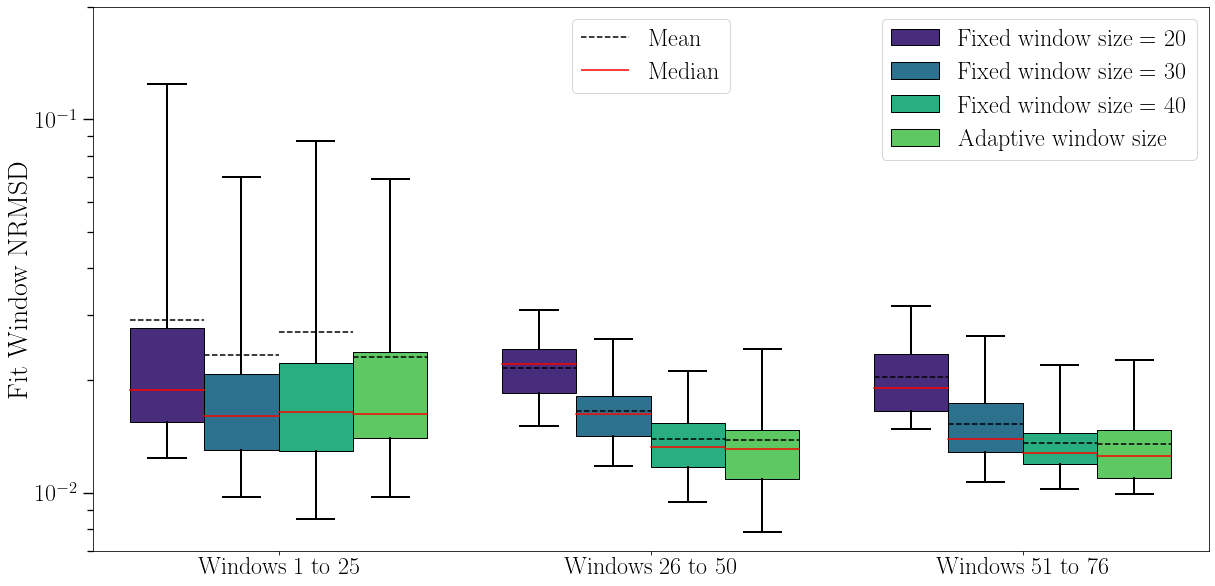

In [174]:
plt.figure(figsize=(20,10))

bp_fix20 = plt.boxplot(rmsd_fix_fit20.mean(axis=0)[:25], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [0], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[0]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
bp_fix30 = plt.boxplot(rmsd_fix_fit.mean(axis=0)[:25], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [0.5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[2]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
bp_fix40 = plt.boxplot(rmsd_fix_fit40.mean(axis=0)[:25], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [1], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[4]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
bp_adap = plt.boxplot(rmsd_adap_fit.mean(axis=0)[:25], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [1.5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[5]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))

plt.boxplot(rmsd_fix_fit20.mean(axis=0)[25:50], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [2.5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[0]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
plt.boxplot(rmsd_fix_fit.mean(axis=0)[25:50], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [3], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[2]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
plt.boxplot(rmsd_fix_fit40.mean(axis=0)[25:50], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [3.5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[4]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
plt.boxplot(rmsd_adap_fit.mean(axis=0)[25:50], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [4], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[5]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))

plt.boxplot(rmsd_fix_fit20.mean(axis=0)[50:], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[0]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
plt.boxplot(rmsd_fix_fit.mean(axis=0)[50:], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [5.5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[2]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
plt.boxplot(rmsd_fix_fit40.mean(axis=0)[50:], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [6], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[4]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
plt.boxplot(rmsd_adap_fit.mean(axis=0)[50:], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [6.5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[5]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))

plt.xlim(-0.5, 7)
plt.ylim(7e-3, 2e-1)
plt.yscale("log")
# plt.ticklabel_format(axis="y", scilimits=(0,1))
plt.xticks([0.75, 3.25, 5.75], ["Windows 1 to 25", "Windows 26 to 50", "Windows 51 to 76"], fontsize=24)
plt.yticks(fontsize=24)
plt.gca().yaxis.set_tick_params(width=1.4, length=10, which="major")
plt.gca().yaxis.set_tick_params(width=1.3, length=6, which="minor")
plt.ylabel("Fit Window NRMSD", fontsize=28)

mean = plt.hlines(1e7,20,25, linestyles = 'dashed', color = 'black', lw = 1.5, label = 'Mean')
median = plt.hlines(1e7,20,25, color = 'red', lw = 1.5, label = 'Median')
leg2 = plt.legend([mean, median], ["Mean", "Median"], loc="upper center", fontsize=24)
plt.legend([bp_fix20["boxes"][0], bp_fix30["boxes"][0], bp_fix40["boxes"][0], bp_adap["boxes"][0]], 
           ["Fixed window size = 20", "Fixed window size = 30", "Fixed window size = 40", "Adaptive window size"], fontsize=24)
plt.gca().add_artist(leg2)

plt.savefig(f"figures/{country_folder}/{window_size}/{country_file_name}_{window_size}_fit_window_nrmsd_boxplot.png", dpi=300, bbox_inches="tight")

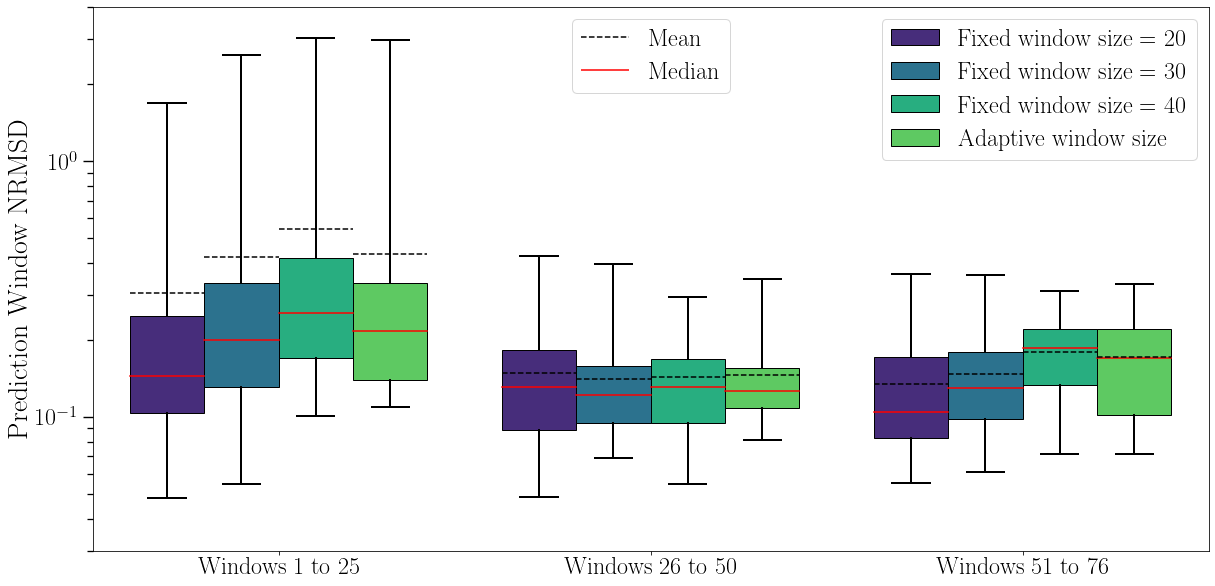

In [177]:
plt.figure(figsize=(20,10))

bp_fix20 = plt.boxplot(rmsd_fix_pred20.mean(axis=0)[:25], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [0], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[0]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
bp_fix30 = plt.boxplot(rmsd_fix_pred.mean(axis=0)[:25], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [0.5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[2]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
bp_fix40 = plt.boxplot(rmsd_fix_pred40.mean(axis=0)[:25], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [1], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[4]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
bp_adap = plt.boxplot(rmsd_adap_pred.mean(axis=0)[:25], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [1.5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[5]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))

plt.boxplot(rmsd_fix_pred20.mean(axis=0)[25:50], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [2.5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[0]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
plt.boxplot(rmsd_fix_pred.mean(axis=0)[25:50], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [3], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[2]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
plt.boxplot(rmsd_fix_pred40.mean(axis=0)[25:50], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [3.5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[4]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
plt.boxplot(rmsd_adap_pred.mean(axis=0)[25:50], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [4], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[5]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))

plt.boxplot(rmsd_fix_pred20.mean(axis=0)[50:], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[0]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
plt.boxplot(rmsd_fix_pred.mean(axis=0)[50:], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [5.5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[2]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
plt.boxplot(rmsd_fix_pred40.mean(axis=0)[50:], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [6], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[4]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
plt.boxplot(rmsd_adap_pred.mean(axis=0)[50:], meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [6.5], widths = [0.5],
            boxprops=dict(facecolor=sb.color_palette('viridis', 7)[5]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))

plt.xlim(-0.5, 7)
plt.ylim(3e-2, 4)
plt.yscale("log")
plt.xticks([0.75, 3.25, 5.75], ["Windows 1 to 25", "Windows 26 to 50", "Windows 51 to 76"], fontsize=24)
plt.yticks(fontsize=24)
plt.gca().yaxis.set_tick_params(width=1.4, length=10, which="major")
plt.gca().yaxis.set_tick_params(width=1.3, length=6, which="minor")
plt.ylabel("Prediction Window NRMSD", fontsize=28)

mean = plt.hlines(1e7,20,25, linestyles = 'dashed', color = 'black', lw = 1.5, label = 'Mean')
median = plt.hlines(1e7,20,25, color = 'red', lw = 1.5, label = 'Median')
leg2 = plt.legend([mean, median], ["Mean", "Median"], loc="upper center", fontsize=24)
plt.legend([bp_fix20["boxes"][0], bp_fix30["boxes"][0], bp_fix40["boxes"][0], bp_adap["boxes"][0]], 
           ["Fixed window size = 20", "Fixed window size = 30", "Fixed window size = 40", "Adaptive window size"], fontsize=24)
plt.gca().add_artist(leg2)

plt.savefig(f"figures/{country_folder}/{window_size}/{country_file_name}_{window_size}_pred_window_nrmsd_boxplot.png", dpi=300, bbox_inches="tight")